In [1]:
!pip install folium

In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

current = os.getcwd()

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('/train.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: '/train.csv'

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = data.drop(columns='dropoff_datetime')
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y = data['trip_duration']
y_mean = y.mean()
t = []
for item in y:
    if item < 10*y_mean:
        t.append(item)
t

[455,
 663,
 2124,
 429,
 435,
 443,
 341,
 1551,
 255,
 1225,
 1274,
 1128,
 1114,
 260,
 1414,
 211,
 2316,
 731,
 1317,
 251,
 486,
 652,
 423,
 1163,
 2485,
 1283,
 1130,
 694,
 892,
 2331,
 1479,
 1048,
 1022,
 2269,
 707,
 526,
 553,
 277,
 1189,
 1523,
 1450,
 1102,
 1346,
 363,
 559,
 1478,
 348,
 375,
 1217,
 876,
 1557,
 1647,
 634,
 365,
 819,
 3528,
 1228,
 2607,
 695,
 472,
 526,
 721,
 512,
 720,
 174,
 478,
 788,
 1003,
 215,
 870,
 814,
 637,
 57,
 589,
 2275,
 647,
 1628,
 2337,
 674,
 1190,
 1191,
 785,
 520,
 218,
 222,
 1204,
 1782,
 1174,
 336,
 470,
 346,
 419,
 1762,
 2341,
 406,
 596,
 435,
 1108,
 2824,
 769,
 1826,
 593,
 2065,
 653,
 1884,
 989,
 419,
 962,
 243,
 373,
 384,
 2753,
 1561,
 505,
 900,
 2116,
 611,
 972,
 604,
 594,
 574,
 297,
 101,
 1041,
 212,
 422,
 1356,
 416,
 1118,
 874,
 321,
 400,
 934,
 773,
 337,
 234,
 474,
 1314,
 482,
 566,
 189,
 913,
 736,
 714,
 815,
 972,
 318,
 625,
 859,
 141,
 983,
 565,
 351,
 342,
 909,
 227,
 1078,
 900,

<Axes: ylabel='Count'>

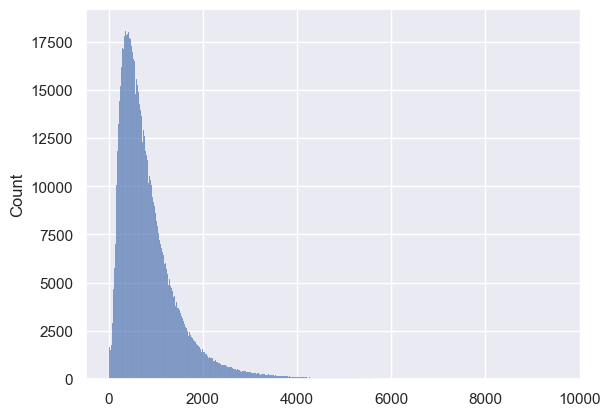

In [7]:
sns.histplot(t)

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
data['log_trip_duration'] = np.log1p(y+1)
# data = data.drop(columns='trip_duration')
log1p_y = np.log1p(y+1)
log1p_y

0          6.124683
1          6.499787
2          7.661998
3          6.066108
4          6.079933
             ...   
1458639    6.659294
1458640    6.487684
1458641    6.641182
1458642    5.926926
1458643    5.298317
Name: trip_duration, Length: 1458644, dtype: float64

In [9]:
from sklearn.metrics import root_mean_squared_error

def rmsle(log1p_y_true, log1p_y_pred): 
    return root_mean_squared_error(log1p_y_true, log1p_y_pred)


rmsle_best_const = rmsle(log1p_y, log1p_y.mean()*np.ones(log1p_y.shape))
rmsle_best_const
# assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7923870986444395

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_year
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.124683,74
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.499787,164
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661998,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.066108,97
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.079933,86
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.659294,99
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.487684,10
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.641182,113
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.926926,5


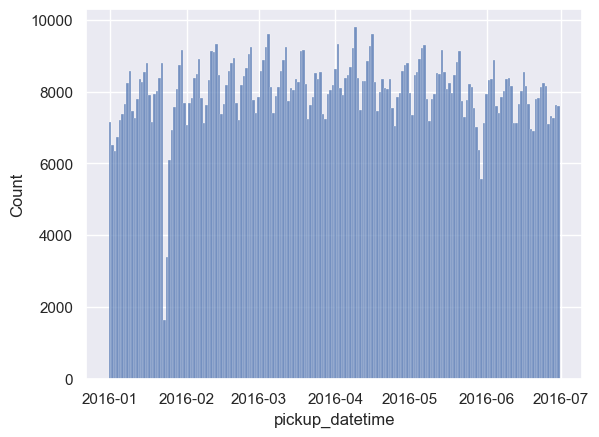

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
days = data['pickup_datetime'].apply(lambda x: x.date())
time = data['pickup_datetime'].apply(lambda x: x.hour)
month = data['pickup_datetime'].apply(lambda x: x.month)
data["day_of_year"] = data['pickup_datetime'].apply(lambda x:x.dayofyear)

sns.histplot(x=days)
from collections import Counter
c = Counter(days).most_common

# january 23-24 blizzard
# may 30 rainfall vrode
data

<Axes: xlabel='pickup_datetime', ylabel='Count'>

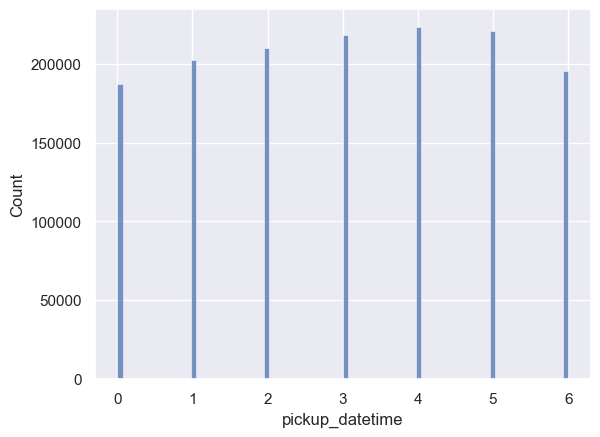

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
weekday = days.apply(lambda x: x.weekday())
sns.histplot(weekday)


<Axes: xlabel='pickup_datetime', ylabel='Count'>

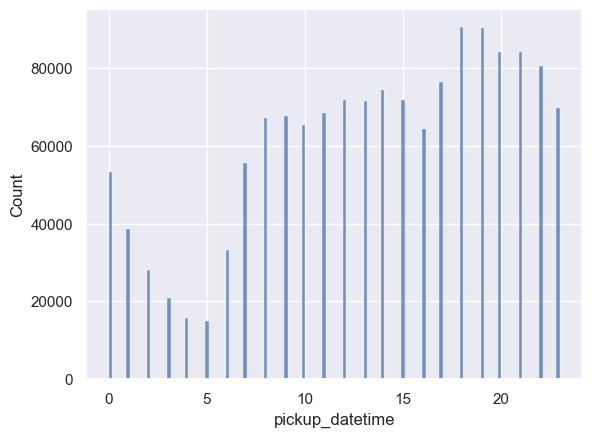

In [12]:
sns.histplot(time)


<Axes: xlabel='pickup_datetime', ylabel='Count'>

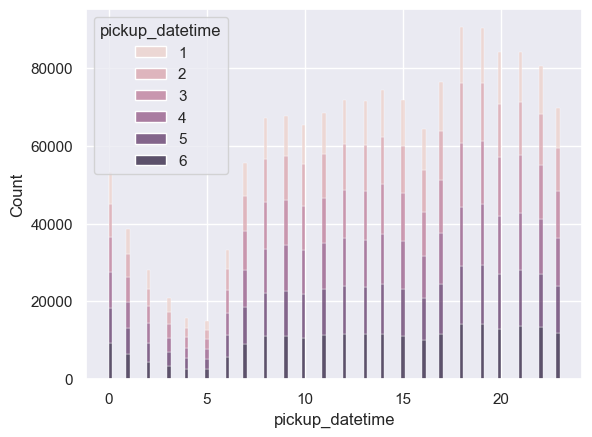

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['weekday'] = weekday
data['time'] = time
data['month'] = month
sns.histplot(data=data, x=time, hue=month, multiple="stack")

<Axes: xlabel='time', ylabel='Count'>

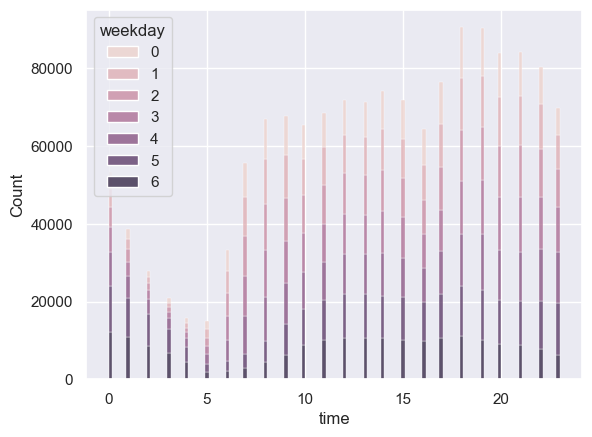

In [14]:
sns.histplot(data=data, x='time', hue='weekday', multiple="stack")

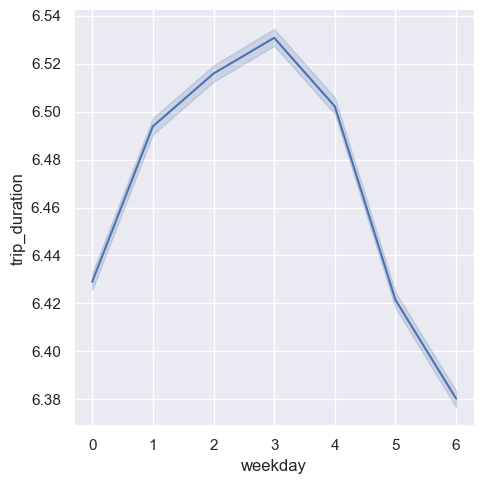

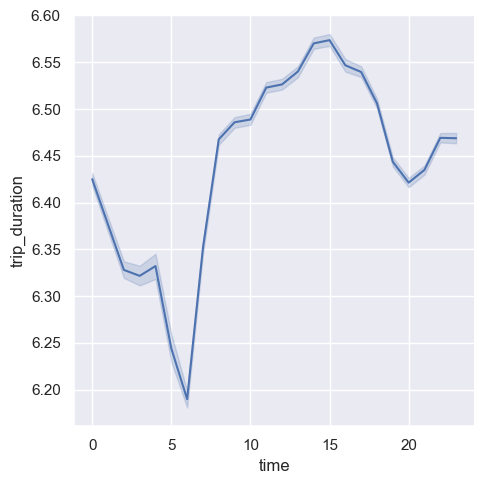

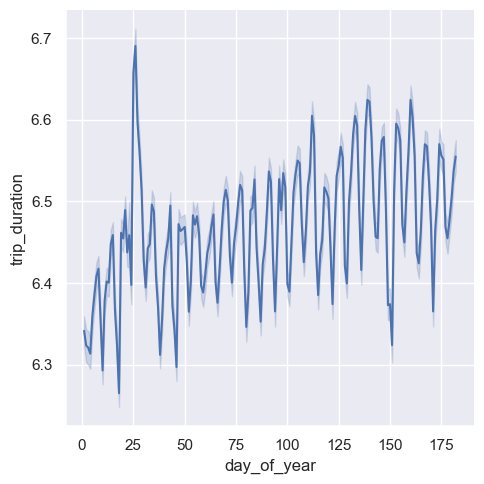

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

sns.relplot(data=data, x='weekday', y=log1p_y, kind='line')
sns.relplot(data=data, x='time', y=log1p_y, kind='line')
sns.relplot(data=data, x='day_of_year', y=log1p_y, kind='line')




In [16]:
from sklearn.model_selection import train_test_split

data = data.astype({"weekday": object, "time": object, "month": object})

X = data.drop(columns=['log_trip_duration', 'trip_duration', 'vendor_id', 'passenger_count', 'id', 'store_and_fwd_flag' ])

X_train, X_test, y_train, y_test = train_test_split(X, log1p_y, test_size=0.3, random_state=10)

In [17]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
numerical = list(X_train.dtypes[X_train.dtypes == "int64"].index)
categorical

['weekday', 'time', 'month']

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numerical)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train) 
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))
print("Train RMSLE = %.4f" % rmsle(y_train, y_pred_train))


Test RMSLE = 0.7842
Train RMSLE = 0.7861


In [1]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-1, 3, 20)
searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)

searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

SyntaxError: positional argument follows keyword argument (2837795976.py, line 4)

Text(0, 0.5, 'CV score')

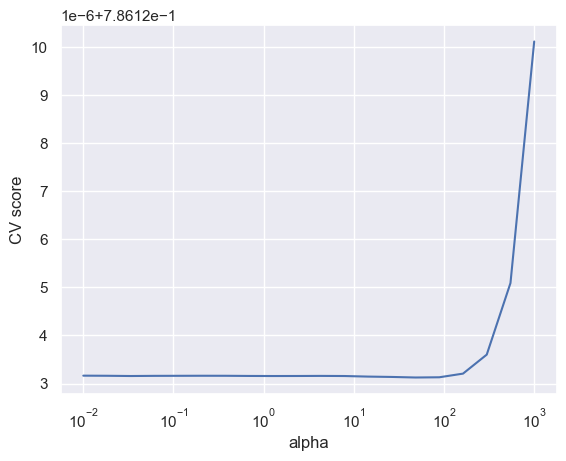

In [23]:
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [24]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train) 
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))
print("Train RMSLE = %.4f" % rmsle(y_train, y_pred_train))

Test RMSLE = 0.7842
Train RMSLE = 0.7861


In [25]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [26]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [27]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics.pairwise import haversine_distances

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

data.loc[:, 'haversine'] = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)


In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.loc[:, 'log_haversine'] = np.log1p(data['haversine'])
data['haversine'].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: haversine, dtype: float64

In [30]:
your_df = data 
your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

True

<Axes: xlabel='mean_velocity', ylabel='Count'>

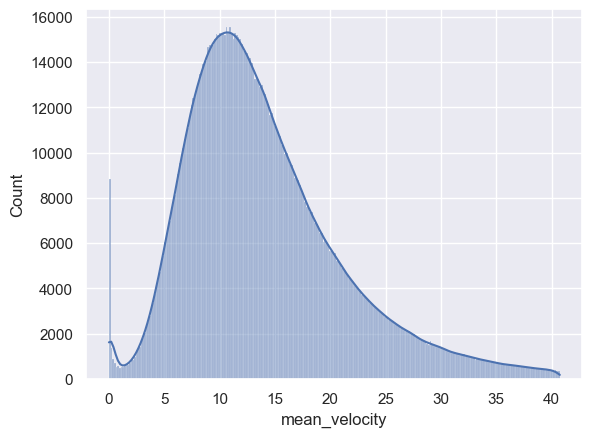

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.loc[:,'mean_velocity'] = data['haversine']*3600/data['trip_duration']
mask = (data['mean_velocity'] < np.quantile(data['mean_velocity'], .99))
sns.histplot(x=data['mean_velocity'][mask], kde=True)

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

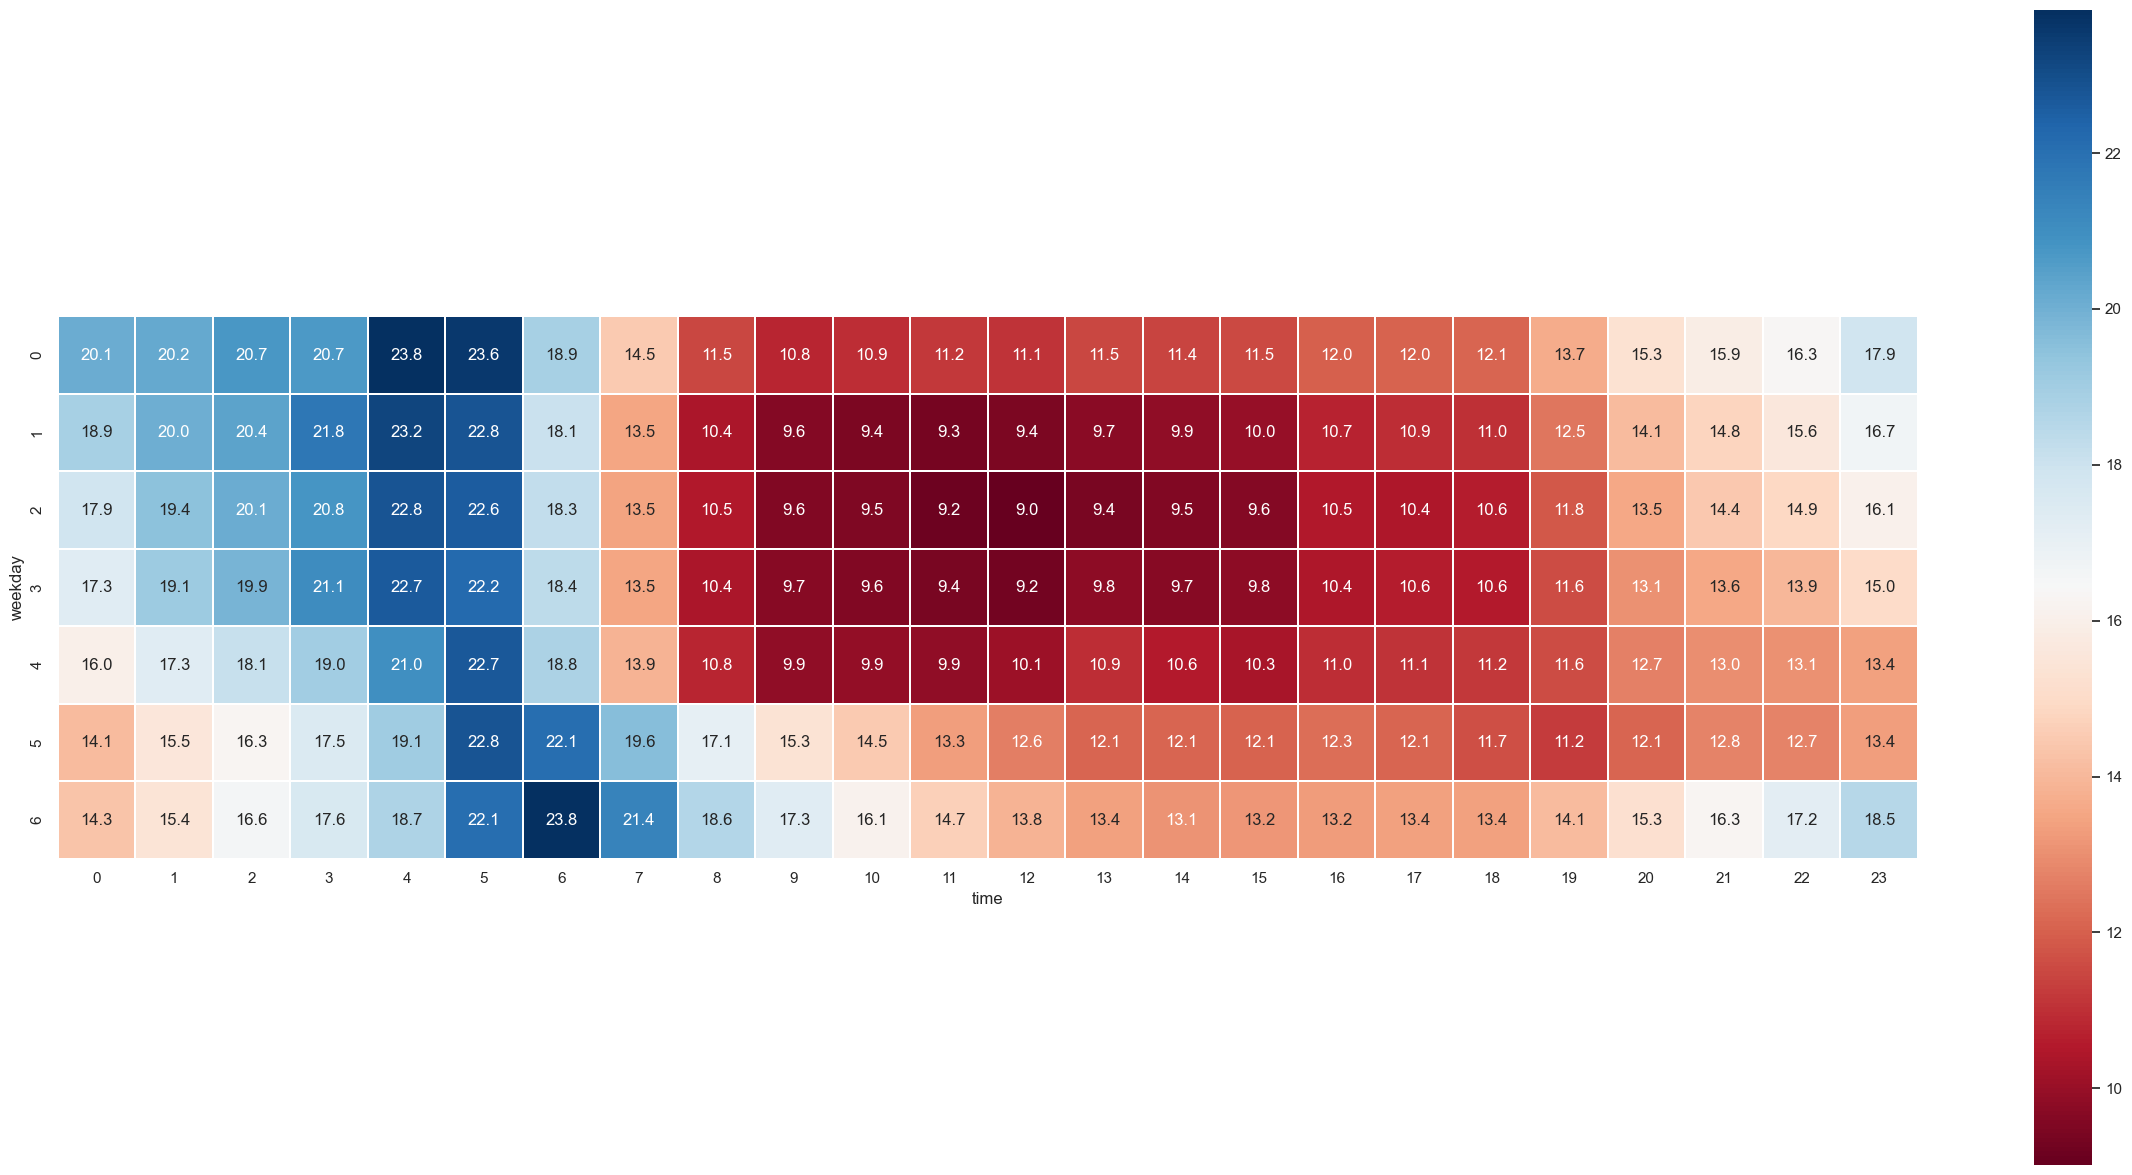

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
day_hour_plot_data = data.groupby(by=['weekday', 'time']).mean_velocity.median().reset_index().pivot(index='weekday', columns='time', values='mean_velocity')
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(day_hour_plot_data, square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

data['is_jam'] = ((data.time >= 8) & (data.time <= 19) & (data.weekday >= 0) & (data.weekday <= 4)).astype(int)
data['is_free'] = ((data.time >= 2) & (data.time <= 6)).astype(int)


In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df_tmp = pd.DataFrame({"pickup_latitude":[40.765, 40.7775, 40.667, 40.63], "pickup_longitude":[-73.8615, -73.88, -73.799, -73.77]}) # Airports


show_circles_on_map(df_tmp, 'pickup_latitude', 'pickup_longitude', 'red')

In [37]:
data['start_a_1'] = ((data['pickup_longitude'] >= -73.88) & (data['pickup_longitude'] <= -73.8615) & (data['pickup_latitude'] <= 40.775) & (data['pickup_latitude'] >=40.765)).astype(int)
data['start_a_2'] = ((data['pickup_longitude'] >= -73.799) & (data['pickup_longitude'] <= -73.77) & (data['pickup_latitude'] <= 40.667) & (data['pickup_latitude'] >=40.63)).astype(int)
data['finish_a_1'] = ((data['dropoff_longitude'] >= -73.88) & (data['dropoff_longitude'] <= -73.8615) & (data['dropoff_latitude'] <= 40.775) & (data['dropoff_latitude'] >=40.765)).astype(int)
data['finish_a_2'] = ((data['dropoff_longitude'] >= -73.799) & (data['dropoff_longitude'] <= -73.77) & (data['dropoff_latitude'] <= 40.667) & (data['dropoff_latitude'] >=40.63)).astype(int)


In [38]:
mask = (data['start_a_1'] == 1)
data['mean_velocity'].mean()

14.423208969201783

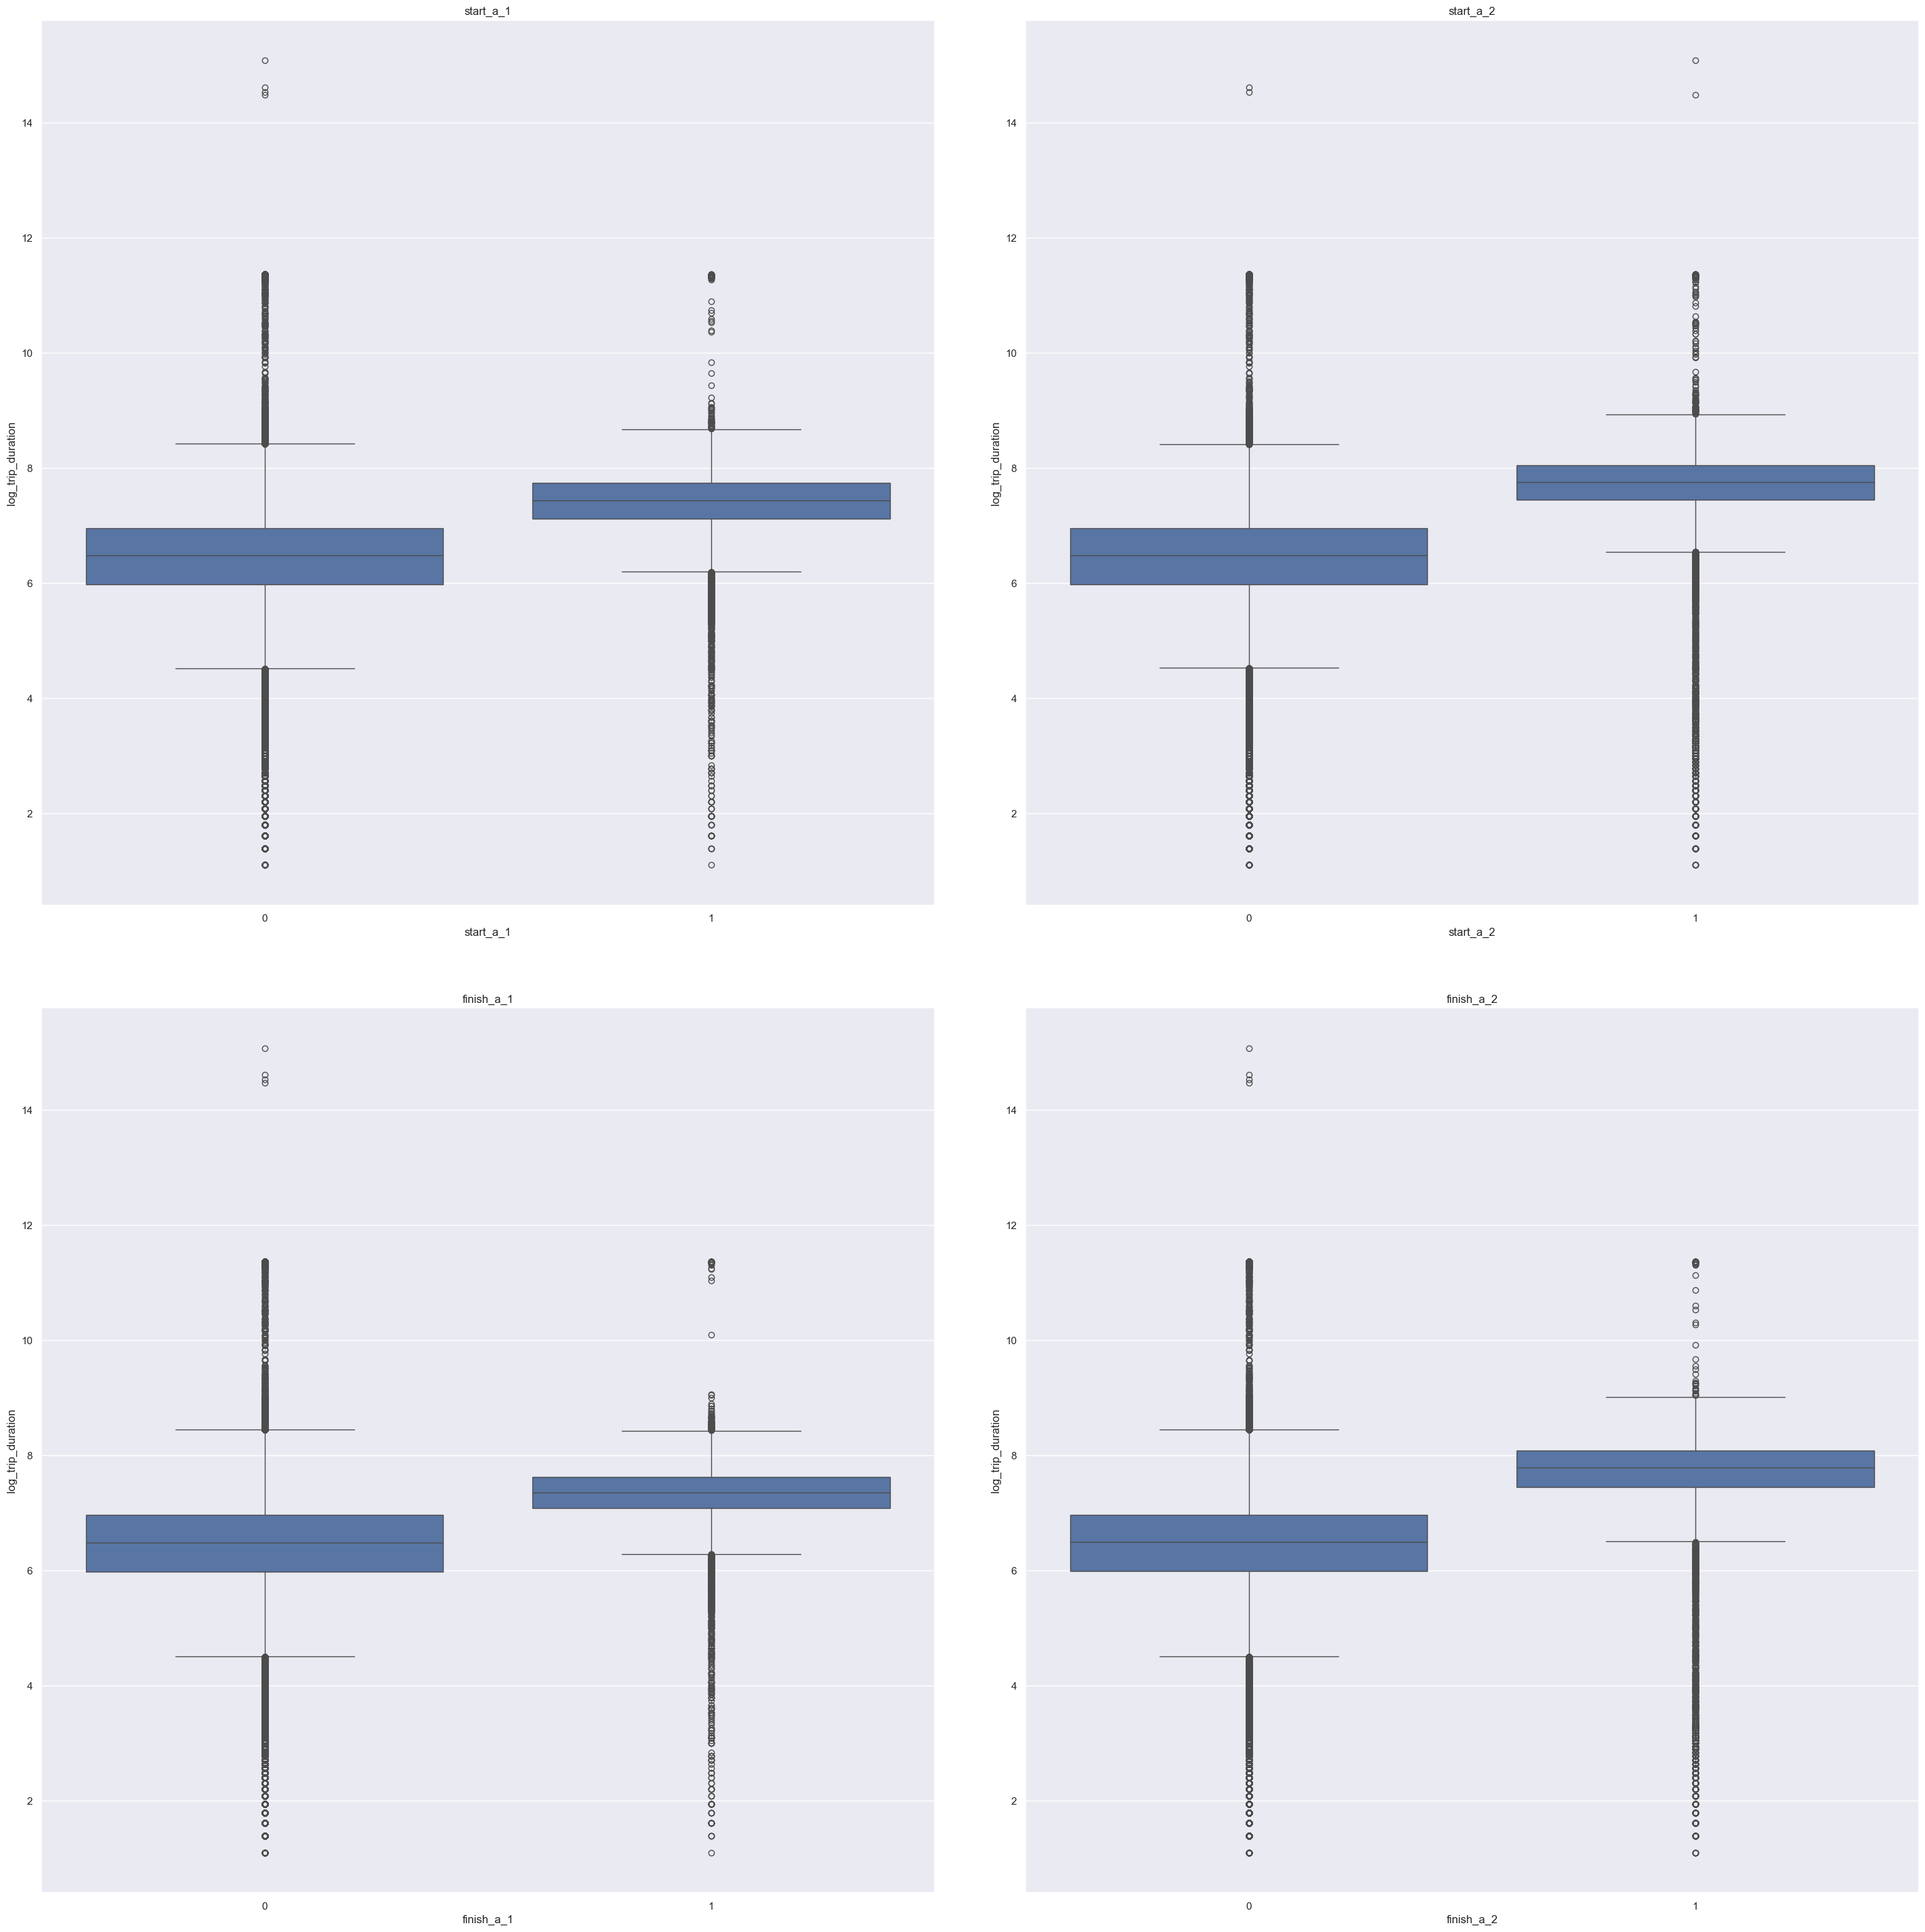

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
subplot = plt.figure(figsize=(30,30))

for i,col in enumerate(['start_a_1', 'start_a_2', 'finish_a_1', 'finish_a_2']):
    plt.subplot(2,2,i+1)
    plt.title(col)
    plt.tight_layout(pad=5)
    sns.boxplot(y=data['log_trip_duration'], x=data[col])

In [40]:
!pip install ipyleaflet

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, Polygon, CircleMarker, LayerGroup

from scipy.spatial.distance import cdist

COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def create_box_(self, loc):
        polygon_loc = [
                    [(loc[0] - self.walls[0] / 2), loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] - self.walls[1] / 2],
                    [loc[0] + self.walls[0] / 2, loc[1] + self.walls[1] / 2],
                    [loc[0] - self.walls[0] / 2, loc[1] + self.walls[1] / 2]
                  ]
        return polygon_loc
    
    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='red',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc

    
    def get_sector_idx(self, X):
        _, self.circles_loc = self._fit()
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]], self.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]], self.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        return pickup_idx, dropoff_idx

    def transform(self, X):
        return (X,) + self.get_sector_idx(X)


In [42]:
mh = np.array([
                [40.703314, -74.018608],
                [40.703314, -73.934241],
                [40.791438, -73.934241],
                [40.791438, -74.018608]
               ])

a = MapGridTransformer(mh, 5, 4)
train_cut = a.transform(data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])  
a.show_map()
train_cut

(         pickup_latitude  pickup_longitude  dropoff_latitude  \
 0              40.767937        -73.982155         40.765602   
 1              40.738564        -73.980415         40.731152   
 2              40.763939        -73.979027         40.710087   
 3              40.719971        -74.010040         40.706718   
 4              40.793209        -73.973053         40.782520   
 ...                  ...               ...               ...   
 1458639        40.745522        -73.982201         40.740170   
 1458640        40.747379        -74.000946         40.796547   
 1458641        40.768799        -73.959129         40.707371   
 1458642        40.749062        -73.982079         40.757107   
 1458643        40.781750        -73.979538         40.790585   
 
          dropoff_longitude  
 0               -73.964630  
 1               -73.999481  
 2               -74.005333  
 3               -74.012268  
 4               -73.972923  
 ...                    ...  
 1458639

In [43]:
data = data.merge(pd.DataFrame({'start_circle':train_cut[1], 'end_circle':train_cut[2]}), left_index=True, right_index=True)


In [138]:
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,log_haversine,mean_velocity,is_jam,is_free,start_a_1,start_a_2,finish_a_1,finish_a_2,start_circle,end_circle
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,455,...,0.915699,11.856428,1,0,0,0,0,0,13,14
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,663,...,1.031584,9.803659,0,0,0,0,0,0,5,4
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,...,1.999464,10.822201,1,0,0,0,0,0,13,0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,429,...,0.910473,12.465721,1,0,0,0,0,0,0,0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,435,...,0.783257,9.836594,0,0,0,0,0,0,-1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,778,...,0.799793,5.668751,1,0,0,0,0,0,9,9
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,655,...,1.953004,33.251005,0,0,0,0,0,0,8,-1
1458641,id2304944,1,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,764,...,2.177544,36.869870,0,1,0,0,0,0,14,0
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,373,...,0.738390,10.544853,1,0,0,0,0,0,9,14


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [144]:
data['isAnomaly'] = data['day_of_year'].isin([23,24,151]).astype(int)
data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,mean_velocity,is_jam,is_free,start_a_1,start_a_2,finish_a_1,finish_a_2,start_circle,end_circle,isAnomaly
0,id2875421,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,455,...,11.856428,1,0,0,0,0,0,13,14,0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,663,...,9.803659,0,0,0,0,0,0,5,4,0
2,id3858529,1,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,...,10.822201,1,0,0,0,0,0,13,0,0
3,id3504673,1,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,429,...,12.465721,1,0,0,0,0,0,0,0,0
4,id2181028,1,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,435,...,9.836594,0,0,0,0,0,0,-1,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,1,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,778,...,5.668751,1,0,0,0,0,0,9,9,0
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,655,...,33.251005,0,0,0,0,0,0,8,-1,0
1458641,id2304944,1,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,764,...,36.869870,0,1,0,0,0,0,14,0,0
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,373,...,10.544853,1,0,0,0,0,0,9,14,0


In [162]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

numeric_features = ['log_haversine']
categorical_features = ['weekday', 'time', 'month', 'start_circle', 'end_circle', 'day_of_year']
train_features = ['weekday', 'time', 'month', 'is_jam', 'is_free', 'start_a_1', 'start_a_2', 'finish_a_1', 'finish_a_2',
                        'start_circle', 'end_circle', 'log_haversine', 'day_of_year']

In [149]:
X = data[train_features]
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
y_train

644977     7.162397
93511      4.859812
444923     6.706862
254434     6.826545
1325050    6.694562
             ...   
321502     6.979145
441633     7.587817
677997     7.078342
239499     6.845880
1152480    7.040536
Name: log_trip_duration, Length: 1021050, dtype: float64

In [150]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)]
    )

pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train RMSE = %.4f" % rmsle(y_test, y_pred))

Train RMSE = 0.4798


In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

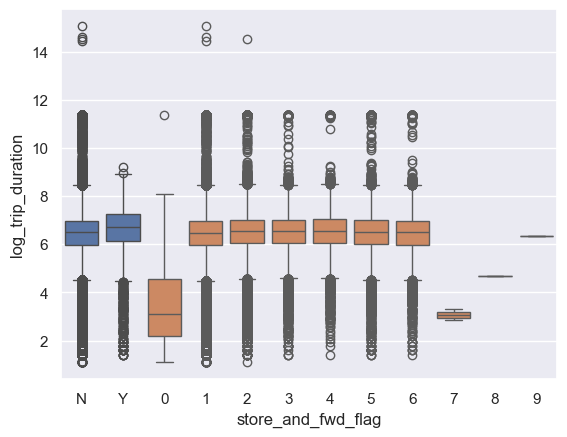

In [49]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

sns.boxplot(data=data,y='log_trip_duration', x='store_and_fwd_flag')
sns.boxplot(data=data,y='log_trip_duration', x='passenger_count')


<Axes: xlabel='vendor_id', ylabel='log_trip_duration'>

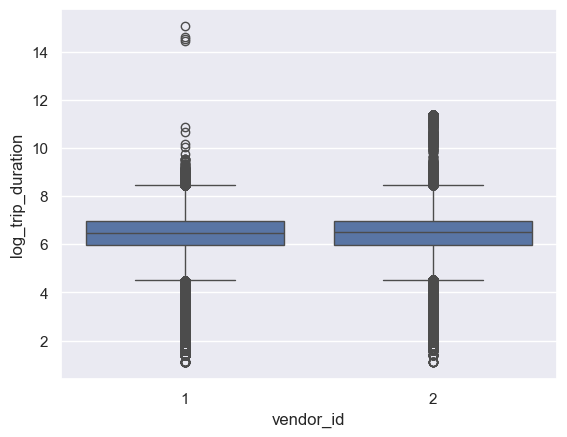

In [50]:
sns.boxplot(data=data,y='log_trip_duration', x='vendor_id')


In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

data['vendor_id'] = data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
data.store_and_fwd_flag.replace({'Y':1}, inplace=True)
data.store_and_fwd_flag.replace({'N':0}, inplace=True)


In [170]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numeric_features = ['log_haversine']
categorical_features = ['day_of_year', 'weekday', 'time', 'end_circle', 'start_circle', 'month', 'passenger_count']
train_features = ['weekday', 'time', 'month', 'is_jam', 'is_free', 'start_a_1', 'start_a_2', 'finish_a_1', 'finish_a_2',
                        'start_circle', 'end_circle', 'log_haversine', 'day_of_year', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']


In [157]:
from sklearn.model_selection import train_test_split
X = data[train_features]
y = data['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=50)


In [158]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)]
    )

pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train RMSE = %.4f" % rmsle(y_test, y_pred))

Train RMSE = 0.4784


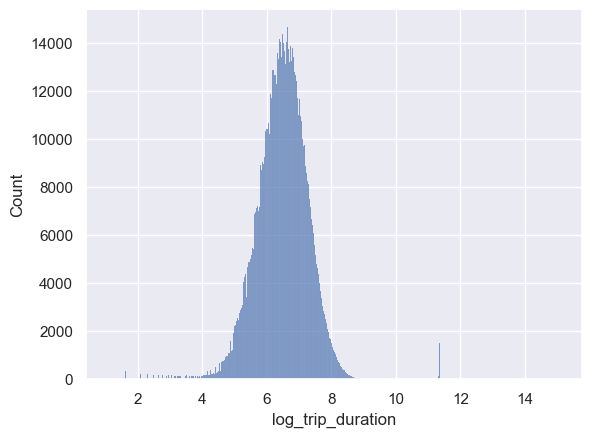

In [159]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(data=data, x='log_trip_duration')
data[(data['haversine'] <= 0.01)]
# data = data[data['log_trip_duration'] > np.quantile(data['log_trip_duration'], .005)]
train = data[data['log_trip_duration'] < 11]
# sns.histplot(data=train, x='log_haversine')


In [166]:
from sklearn.model_selection import train_test_split
X = train[train_features]
y = train['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=50)


In [161]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)]
    )

pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train RMSE = %.4f" % rmsle(y_test, y_pred))

Train RMSE = 0.4441


In [181]:
cols = ["start_a_1","start_a_2","finish_a_1", 'finish_a_2']
train = train.eval("airports = 0+(0!=(start_a_1 + start_a_2 + finish_a_1 + finish_a_2))").drop(columns=cols)
train['airports']

0          0
1          0
2          0
3          0
4          0
          ..
1458639    0
1458640    0
1458641    0
1458642    0
1458643    0
Name: airports, Length: 1456678, dtype: int64

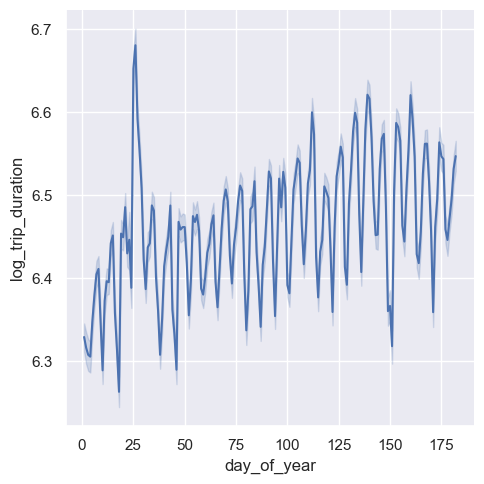

In [133]:
sns.relplot(data=train, x='day_of_year', y='log_trip_duration', kind='line')


In [196]:
numeric_features = ['log_haversine']
categorical_features = ['day_of_year', 'weekday', 'time', 'end_circle', 'start_circle', 'month', 'passenger_count']
train_features = ['weekday', 'time', 'month', 'is_jam', 'is_free', 'airports',
                        'start_circle', 'end_circle', 'log_haversine', 'day_of_year', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
X = train[train_features]
y = train['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=50)

In [197]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train[categorical_features]
train = train[train['passenger_count'] <= 6]
train['passenger_count'] = train['passenger_count'].apply(lambda x: 1 if x > 0 else 0)


In [198]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train RMSE = %.4f" % rmsle(y_test, y_pred))

Train RMSE = 0.4443


In [199]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Size before OneHot:", train[train_features].shape)
print("Size after OneHot:", column_transformer.transform(train[train_features]).shape)

Size before OneHot: (1456678, 13)
Size after OneHot: (1456678, 264)


In [225]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

pipelineL = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(0.0001))
])

modelL = pipelineL.fit(X_train, y_train)
y_pred = modelL.predict(X_test)
print("Train RMSE = %.4f" % rmsle(y_test, y_pred))

Train RMSE = 0.4446


In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [230]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train['route'] = train.apply(lambda x: (x['start_circle'], x['end_circle']), axis=1)

In [231]:
train['route']

0          (13, 14)
1            (5, 4)
2           (13, 0)
3            (0, 0)
4          (-1, 18)
             ...   
1458639      (9, 9)
1458640     (8, -1)
1458641     (14, 0)
1458642     (9, 14)
1458643    (17, 18)
Name: route, Length: 1456678, dtype: object

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.